<a href="https://colab.research.google.com/github/sarojkhanal-git/CBEAS-Project-Preprocessing/blob/Very_New_Codes/Resampling_of_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import nibabel as nib
from glob import glob
import os
from matplotlib import pyplot as plt
from nibabel.processing import resample_from_to

In [2]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
def resampling(image_files, label_files, output_directory):

  for f, g in zip(image_files, label_files):
    image = nib.load(f)
    label = nib.load(g)

    resampled_image = resample_from_to(image, label)

    nib.save(resampled_image, os.path.join(output_directory, os.path.basename(f)))

    print(f"Resampled and saved to {os.path.join(output_directory, os.path.basename(f))}")


In [4]:
image_files = sorted(glob('/content/drive/MyDrive/image_directory_temp/*.nii.gz'))
label_files = sorted(glob('/content/drive/MyDrive/label_directory_temp/*.nii.gz'))
output_directory = '/content/drive/MyDrive/resampled_image_directory'

os.makedirs(output_directory, exist_ok=True)

In [5]:
resampling(image_files, label_files, output_directory)

Resampled and saved to /content/drive/MyDrive/resampled_image_directory/OAS30131_MR_d1901_T1w.nii.gz
Resampled and saved to /content/drive/MyDrive/resampled_image_directory/OAS30132_MR_d2288_T1w.nii.gz
Resampled and saved to /content/drive/MyDrive/resampled_image_directory/OAS30133_MR_d0505_T1w.nii.gz
Resampled and saved to /content/drive/MyDrive/resampled_image_directory/OAS30134_MR_d1642_T1w.nii.gz
Resampled and saved to /content/drive/MyDrive/resampled_image_directory/OAS30135_MR_d0190_T1w.nii.gz
Resampled and saved to /content/drive/MyDrive/resampled_image_directory/OAS30136_MR_d0063_T1w.nii.gz
Resampled and saved to /content/drive/MyDrive/resampled_image_directory/OAS30137_MR_d3165_T1w.nii.gz
Resampled and saved to /content/drive/MyDrive/resampled_image_directory/OAS30138_MR_d0074_T1w.nii.gz
Resampled and saved to /content/drive/MyDrive/resampled_image_directory/OAS30139_MR_d1702_T1w.nii.gz
Resampled and saved to /content/drive/MyDrive/resampled_image_directory/OAS30140_MR_d0172_T

In [6]:
resampled_image_files = sorted(glob('/content/drive/MyDrive/resampled_image_directory/*.nii.gz'))
len(resampled_image_files)

25

In [10]:
len(sorted(glob('/content/drive/MyDrive/Datasets_for_model/resampled_image_directory/*.nii.gz'))), len(sorted(glob('/content/drive/MyDrive/Datasets_for_model/label_directory/*.nii.gz')))

(171, 171)

In [8]:
import shutil
des = '/content/drive/MyDrive/Datasets_for_model/resampled_image_directory/'

for f in resampled_image_files:
  shutil.copy(f, des)



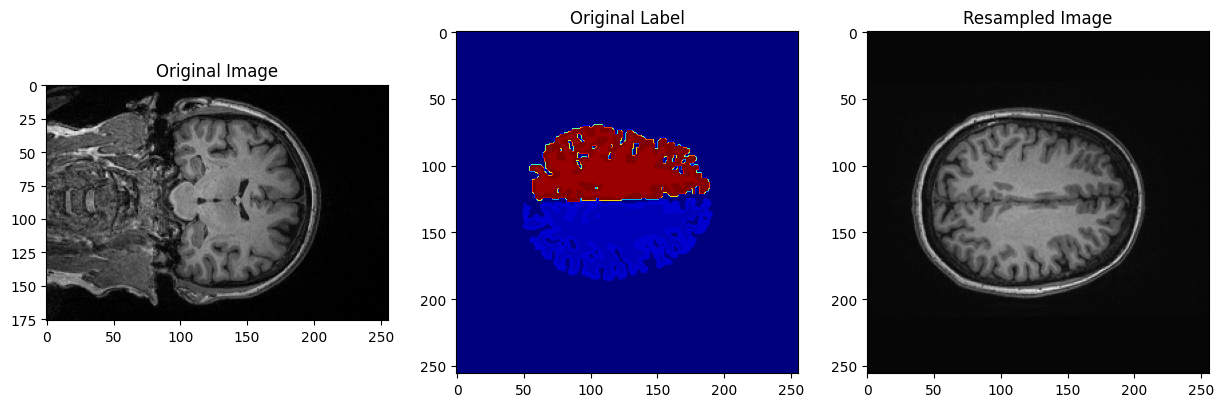

In [ ]:
fig, ax = plt.subplots(1, 3, figsize = (15, 5))

ax[0].imshow(nib.load(image_files[0]).get_fdata()[:, 120, :], cmap = 'gray')
ax[1].imshow(nib.load(label_files[0]).get_fdata()[:, 100, :], cmap = 'jet')
ax[2].imshow(nib.load(resampled_image_files[0]).get_fdata()[:, 100, :], cmap = 'gray')

ax[0].set_title('Original Image')
ax[1].set_title('Original Label')
ax[2].set_title('Resampled Image')

plt.show()